# LangSmith and Evaluation Overview with AI Makerspace

Today we'll be looking at an amazing tool:

[LangSmith](https://docs.smith.langchain.com/)!

This tool will help us monitor, test, debug, and evaluate our LangChain applications - and more!

We'll also be looking at a few Advanced Retrieval techniques along the way - and evaluate it using LangSmith!

✋BREAKOUT ROOM #2:
- Task 1: Dependencies and OpenAI API Key
- Task 2: LCEL RAG Chain
- Task 3: Setting Up LangSmith
- Task 4: Examining the Trace in LangSmith!
- Task 5: Create Testing Dataset
- Task 6: Evaluation

## Task 1: Dependencies and OpenAI API Key

We'll be using OpenAI's suite of models today to help us generate and embed our documents for a simple RAG system built on top of LangChain's blogs!

In [1]:
!pip install langchain_core langchain_openai langchain_community langchain-qdrant qdrant-client langsmith openai tiktoken cohere lxml -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.9/258.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.8/207.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7

In [1]:
import os
#import getpass

#os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API Key:")

#### Asyncio Bug Handling

This is necessary for Colab.

In [2]:
import nest_asyncio
nest_asyncio.apply()

## Task #2: Create a Simple RAG Application Using Qdrant, Hugging Face, and LCEL

Now that we have a grasp on how LCEL works, and how we can use LangChain and Hugging Face to interact with our data - let's step it up a notch and incorporate Qdrant!

## LangChain Powered RAG

First and foremost, LangChain provides a convenient way to store our chunks and their embeddings.

It's called a `VectorStore`!

We'll be using QDrant as our `VectorStore` today. You can read more about it [here](https://qdrant.tech/documentation/).

Think of a `VectorStore` as a smart way to house your chunks and their associated embedding vectors. The implementation of the `VectorStore` also allows for smarter and more efficient search of our embedding vectors - as the method we used above would not scale well as we got into the millions of chunks.

Otherwise, the process remains relatively similar under the hood!

We'll use a SiteMapLoader to scrape the LangChain blogs - which will serve as our data for today!

### Data Collection

We'll be leveraging the `SitemapLoader` to load our PDF directly from the web!

In [3]:
from langchain.document_loaders import SitemapLoader

documents = SitemapLoader(web_path="https://blog.langchain.dev/sitemap-posts.xml").load()

USER_AGENT environment variable not set, consider setting it to identify your requests.
Fetching pages: 100%|##########| 220/220 [00:14<00:00, 15.02it/s]


In [5]:
documents[:5]

[Document(metadata={'source': 'https://blog.langchain.dev/customers-podium/', 'loc': 'https://blog.langchain.dev/customers-podium/', 'lastmod': '2024-08-15T14:00:05.000Z'}, page_content="\n\n\nHow Podium optimized agent behavior and reduced engineering intervention by 90% with LangSmith\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAll Posts\n\n\n\n\nCase Studies\n\n\n\n\nIn the Loop\n\n\n\n\nLangChain\n\n\n\n\nDocs\n\n\n\n\nChangelog\n\n\n\n\n\nSign in\nSubscribe\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHow Podium optimized agent behavior and reduced engineering intervention by 90% with LangSmith\nSee how Podium tests across the lifecycle development of their AI employee agent, using LangSmith for dataset curation and finetuning. They improved agent F1 response quality to 98% and reduced the need for engineering intervention by 90%.\n\n5 min read\nAug 15, 2024\n\n\n\n\n\nAbout PodiumP

### Chunking Our Documents

Let's do the same process as we did before with our `RecursiveCharacterTextSplitter` - but this time we'll use ~200 tokens as our max chunk size!

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 0,
    length_function = len,
)

split_chunks = text_splitter.split_documents(documents)

In [7]:
len(split_chunks)

4821

In [6]:
from aimakerspace.openai_utils.chatmodel import ChatOpenAI
from aimakerspace.openai_utils.embedding import EmbeddingModel
from aimakerspace.semantic_chunking import SemanticChunking
from aimakerspace.pdfloader import PDFLoader
import pprint

chat_openai = ChatOpenAI(model_name="gpt-4o-mini")

In [7]:
embedding_model = EmbeddingModel()
chunker = SemanticChunking(embedding_model, breakpoint_threshold_type="percentile")

In [8]:
split_pages = []
for doc in documents:
    split_pages += chunker.split_text(doc.page_content)

In [9]:
split_documents = [i.page_content for i in split_pages]

In [10]:
split_documents[:5]

["\n\n\nHow Podium optimized agent behavior and reduced engineering intervention by 90% with LangSmith\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAll Posts\n\n\n\n\nCase Studies\n\n\n\n\nIn the Loop\n\n\n\n\nLangChain\n\n\n\n\nDocs\n\n\n\n\nChangelog\n\n\n\n\n\nSign in\nSubscribe\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHow Podium optimized agent behavior and reduced engineering intervention by 90% with LangSmith\nSee how Podium tests across the lifecycle development of their AI employee agent, using LangSmith for dataset curation and finetuning. They improved agent F1 response quality to 98% and reduced the need for engineering intervention by 90%. 5 min read\nAug 15, 2024\n\n\n\n\n\nAbout PodiumPodium is a communication platform that helps small businesses connect quickly with customers via phone, text, email, and social media. Small businesses often have high-touch interactions w

Alright, now we have 516 ~200 token long documents.

Let's verify the process worked as intended by checking our max document length.

In [9]:
max_chunk_length = 0

for chunk in split_chunks:
  max_chunk_length = max(max_chunk_length, len(chunk.page_content))

print(max_chunk_length)

499


In [11]:
max_chunk_length = 0

for chunk in split_pages:
    max_chunk_length = max(max_chunk_length, len(chunk.page_content))

print(max_chunk_length)

26224


Perfect! Now we can carry on to creating and storing our embeddings.

### Embeddings and Vector Storage

We'll use the `text-embedding-3-small` embedding model again - and `Qdrant` to store all our embedding vectors for easy retrieval later!

In [15]:
from langchain_community.vectorstores import Qdrant
from langchain_openai.embeddings import OpenAIEmbeddings

embedding_model2 = OpenAIEmbeddings(model="text-embedding-3-small")

qdrant_vectorstore = Qdrant.from_documents(
    documents=split_pages, embedding=embedding_model2, location=":memory:"
)

In [ ]:
from langchain_community.vectorstores import Qdrant
from langchain_openai.embeddings import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

qdrant_vectorstore = Qdrant.from_documents(
    documents=split_chunks, embedding=embedding_model, location=":memory:"
)

Now let's set up our retriever, just as we saw before, but this time using LangChain's simple `as_retriever()` method!

In [16]:
qdrant_retriever = qdrant_vectorstore.as_retriever()

#### Back to the Flow

We're ready to move to the next step!

### Setting up our RAG

We'll use the LCEL we touched on earlier to create a RAG chain.

Let's think through each part:

1. First we need to retrieve context
2. We need to pipe that context to our model
3. We need to parse that output

Let's start by setting up our prompt again, just so it's fresh in our minds!

####🏗️ Activity #2:

Complete the prompt so that your RAG application answers queries based on the context provided, but *does not* answer queries if the context is unrelated to the query.

In [13]:
from langchain.prompts import ChatPromptTemplate

base_rag_prompt_template = """
Use the provided context to answer the user's query.

You may not answer the user's query unless there is specific context in the following text.

If you do not know the answer, or cannot answer, please respond with "I don't know".

Context:
{context}

Question:
{question}
"""

base_rag_prompt = ChatPromptTemplate.from_template(base_rag_prompt_template)

We'll set our Generator - `gpt-4o` in this case - below!

In [17]:
from langchain_openai.chat_models import ChatOpenAI

base_llm = ChatOpenAI(model="gpt-4o-mini", tags=["base_llm"])

#### Our RAG Chain

Notice how we have a bit of a more complex chain this time - that's because we want to return our sources with the response.

Let's break down the chain step-by-step:

1. We invoke the chain with the `question` item. Notice how we only need to provide `question` since both the retreiver and the `"question"` object depend on it.
  - We also chain our `"question"` into our `retriever`! This is what ultimately collects the context through Qdrant.
2. We assign our collected context to a `RunnablePassthrough()` from the previous object. This is going to let us simply pass it through to the next step, but still allow us to run that section of the chain.
3. We finally collect our response by chaining our prompt, which expects both a `"question"` and `"context"`, into our `llm`. We also, collect the `"context"` again so we can output it in the final response object.

The key thing to keep in mind here is that we need to pass our context through *after* we've retrieved it - to populate the object in a way that doesn't require us to call it or try and use it for something else.

In [18]:
from operator import itemgetter
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough

retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | qdrant_retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": base_rag_prompt | base_llm, "context": itemgetter("context")}
)

Let's get a visual understanding of our chain!

In [19]:
!pip install -qU grandalf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.2 MB/s eta 0:00:00


In [27]:
print(retrieval_augmented_qa_chain.get_graph().draw_ascii())

          +---------------------------------+      
          | Parallel<context,question>Input |      
          +---------------------------------+      
                    **            **               
                  **                **             
                **                    **           
         +--------+                     **         
         | Lambda |                      *         
         +--------+                      *         
              *                          *         
              *                          *         
              *                          *         
  +----------------------+          +--------+     
  | VectorStoreRetriever |          | Lambda |     
  +----------------------+          +--------+     
                    **            **               
                      **        **                 
                        **    **                   
          +----------------------------------+     
          | 

Let's try another visual representation:

![image](https://i.imgur.com/Ad31AhL.png)

Let's test our chain out!

In [19]:
response = retrieval_augmented_qa_chain.invoke({"question" : "What's new in LangChain v0.2?"})

In [20]:
import pprint
response = retrieval_augmented_qa_chain.invoke(
    {
        "question": "Can you tell me about Langchain v0.1 vs v0.2?"
    }
)
pprint.pprint(response["response"].content)

('LangChain v0.1 laid the groundwork for the package, focusing on core '
 'abstractions and a standard way to develop context-aware reasoning '
 'applications with LLMs. It was structured around a single package that '
 'included various integrations and components, but as the ecosystem grew, it '
 'became necessary to rethink the architecture.\n'
 '\n'
 'In contrast, LangChain v0.2 builds upon the foundation of v0.1 and '
 'introduces several significant improvements:\n'
 '\n'
 '1. **Decoupling of Packages**: v0.2 separates the langchain package from '
 'langchain-community, making langchain more lightweight and focused. '
 'Langchain-community now depends on langchain-core and langchain, which '
 'enhances security and reduces vulnerabilities.\n'
 '\n'
 '2. **Versioned Documentation**: The documentation has been revamped to be '
 'versioned, addressing community feedback. There is now a clearer structure '
 'with sections for tutorials, how-to guides, conceptual guides, and API '
 'r

In [31]:
for context in response["context"]:
  print("Context:")
  print(context)
  print("----")

Context:
page_content='


LangChain v0.2: A Leap Towards Stability




















































Skip to content
















All Posts




Case Studies




In the Loop




LangChain




Docs




Changelog





Sign in
Subscribe



















LangChain v0.2: A Leap Towards Stability
Today, we're announcing the pre-release of LangChain v0.2, which improves the stability and security of LangChain. 5 min read
May 10, 2024





Four months ago, we released the first stable version of LangChain. Today, we are following up by announcing a pre-release of langchain v0.2.This release builds upon the foundation laid in v0.1 and incorporates community feedback. We’re excited to share that v0.2 brings: A much-desired full separation of langchain and langchain-community New (and versioned!) docs A more mature and controllable agent framework Improved LLM interface standardization, particularly around tool callingBetter streaming support30+ new partner packages.This is 

Let's see if it can handle a query that is totally unrelated to the source documents.

In [32]:
response = retrieval_augmented_qa_chain.invoke({"question" : "What is the airspeed velocity of an unladen swallow?"})

In [33]:
response["response"].content

"I don't know."

## Task 3: Setting Up LangSmith

Now that we have a chain - we're ready to get started with LangSmith!

We're going to go ahead and use the following `env` variables to get our Colab notebook set up to start reporting.

If all you needed was simple monitoring - this is all you would need to do!

In [43]:
from uuid import uuid4

unique_id = uuid4().hex[0:8]

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"LangSmith - {unique_id}"

### LangSmith API

In order to use LangSmith - you will need a beta key, you can join the queue through the `Beta Sign Up` button on LangSmith's homepage!

Join [here](https://www.langchain.com/langsmith)

In [28]:
#os.environ["LANGCHAIN_API_KEY"] = getpass.getpass('Enter your LangSmith API key: ')

Enter your LangSmith API key: ··········


Let's test our our first generation!

In [29]:
retrieval_augmented_qa_chain.invoke({"question" : "What is LangSmith?"}, {"tags" : ["Demo Run"]})['response']

AIMessage(content='LangSmith is a framework built on top of LangChain, designed to enhance the development and performance of AI-powered applications, particularly those involving Large Language Models (LLMs). It provides tools for tracking, fine-grain control, and customizability, which are crucial for improving the reliability and observability of LLM-based systems. LangSmith includes features such as an SDK for easy integration and a tracing mechanism to log runs and iterations, facilitating rapid development and optimization. It is utilized by various teams, such as Athena Intelligence and Wordsmith, to accelerate prompt engineering, improve product quality, and manage complex optimization challenges in their AI workflows.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 901, 'total_tokens': 1028}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_3aa7262c27', 'finish_reason': 'stop', 'logprobs': None}, 

## Task 4: Examining the Trace in LangSmith!

Head on over to your LangSmith web UI to check out how the trace looks in LangSmith!

#### 🏗️ Activity #1:

Include a screenshot of your trace and explain what it means.



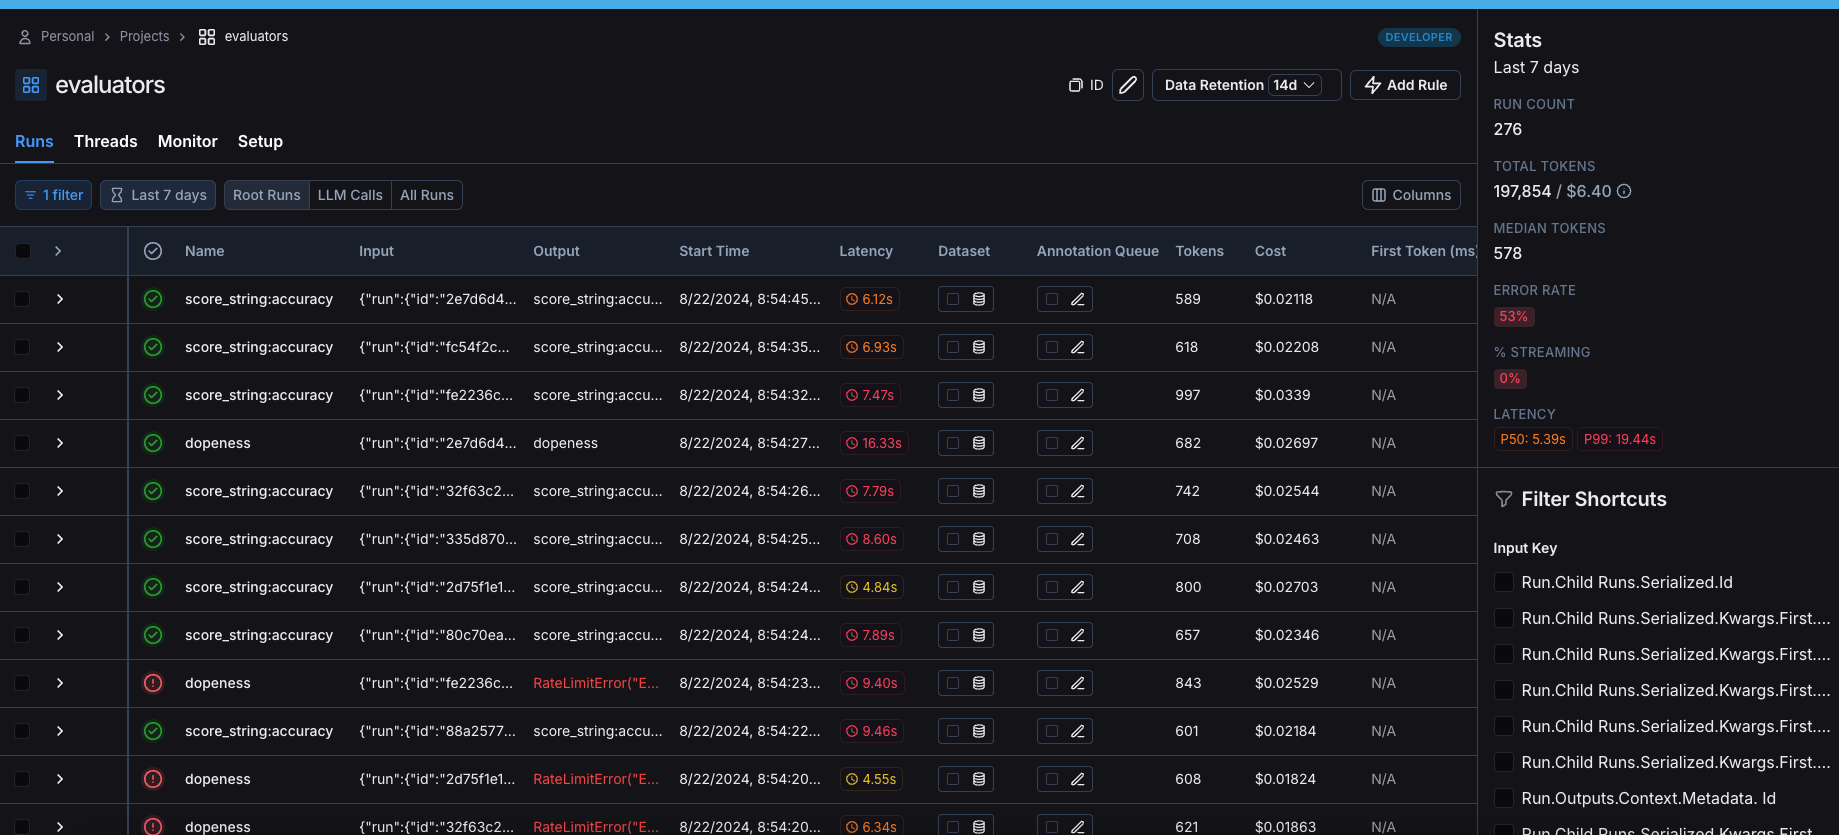

## Task 5: Loading Our Testing Set

In [34]:
!git clone https://github.com/AI-Maker-Space/DataRepository.git

python(37529) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Cloning into 'DataRepository'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 84 (delta 23), reused 28 (delta 8), pack-reused 8 (from 1)
Receiving objects: 100% (84/84), 70.08 MiB | 18.89 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [1]:
import pandas as pd

test_df = pd.read_csv("DataRepository/langchain_blog_test_data.csv")

In [2]:
pd.set_option('display.max_colwidth', None)

In [2]:
test_df

,Unnamed: 0,question,context,idx,answer
0,0,How did Podium improve their agent F1 response...,How Podium optimized agent behavior and reduce...,0,Podium optimized agent behavior and reduced en...
1,1,How did Athena Intelligence utilize LangSmith ...,How Athena Intelligence optimized research rep...,40,Athena Intelligence used the LangSmith playgro...
2,2,What are the four strategies supported by Lang...,"and with LangGraph and LangSmith, LangChain de...",80,LangGraph Cloud provides four different strate...
3,3,What action is required after receiving the su...,Tags\n\n\n\nJoin our newsletter\nUpdates from ...,120,Please check your inbox and click the link to ...
4,4,What are the key features of the Open Source E...,Open Source Extraction Service\n\n\n\n\n\n\n\n...,160,The Open Source Extraction Service is a newly ...
5,5,What are the main subsections of Gödel's mathe...,"{'article_h1_main': 'Kurt Gödel', 'article_h2_...",200,"The question isn't provided, but based on the ..."
6,6,"What should you do after receiving the ""Succes...",Tags\nBy LangChain\n\n\nJoin our newsletter\nU...,240,Subscribe
7,7,What is the role of the ISUSE token in the Sel...,"output is yes, no, continueISREL token decides...",280,The ISUSE token decides whether the generation...
8,8,What should enterprises do if they are looking...,strategies to get the Assistant architecture t...,320,gtm@langchain.dev
9,9,What is the purpose of using LangChain in the ...,"As 2023 comes to a close, Graphite wanted to c...",360,"Year in code is a personalized, AI-generated v..."


Now we can set up our LangSmith client - and we'll add the above created dataset to our LangSmith instance!

> NOTE: Read more about this process [here](https://docs.smith.langchain.com/old/evaluation/faq/manage-datasets#create-from-list-of-values)

In [44]:
from langsmith import Client

client = Client()

dataset_name = "langsmith-demo-dataset-aie4-triples-v4"

dataset = client.create_dataset(
    dataset_name=dataset_name, description="LangChain Blog Test Questions"
)

for triplet in test_df.iterrows():
  triplet = triplet[1]
  client.create_example(
      inputs={"question" : triplet["question"], "context": triplet["context"]},
      outputs={"answer" : triplet["answer"]},
      dataset_id=dataset.id
  )

## Task 6: Evaluation

Now we can run the evaluation!

We'll need to start by preparing some custom data preparation functions to ensure our chain works with the expected inputs/outputs from the `evaluate` process in LangSmith.

> NOTE: More reading on this available [here](https://docs.smith.langchain.com/how_to_guides/evaluation/evaluate_llm_application#evaluate-a-langchain-runnable)

In [45]:
def prepare_data_ref(run, example):
  return {
      "prediction" : run.outputs["response"],
      "reference" : example.outputs["answer"],
      "input" : example.inputs["question"]
  }

def prepare_data_noref(run, example):
  return {
      "prediction" : run.outputs["response"],
      "input" : example.inputs["question"]
  }

def prepare_context_ref(run, example):
  return {
      "prediction" : run.outputs["response"],
      "reference" : example.inputs["context"],
      "input" : example.inputs["question"]
  }

We'll be using a few custom evaluators to evaluate our pipeline, as well as a few "built in" methods!

Check out the built-ins [here](https://docs.smith.langchain.com/reference/sdk_reference/langchain_evaluators)!

In [46]:
from langsmith.evaluation import LangChainStringEvaluator, evaluate

cot_qa_evaluator = LangChainStringEvaluator("cot_qa", prepare_data=prepare_context_ref)

unlabeled_dopeness_evaluator = LangChainStringEvaluator(
    "criteria",
    config={
        "criteria" : {
            "dopeness" : "Is the answer to the question dope, meaning cool - awesome - and legit?"
        }
    },
    prepare_data=prepare_data_noref
)

labeled_score_evaluator = LangChainStringEvaluator(
    "labeled_score_string",
    config={
        "criteria": {
            "accuracy": "Is the generated answer the same as the reference answer?"
        },
    },
    prepare_data=prepare_data_ref
)

base_rag_results = evaluate(
    retrieval_augmented_qa_chain.invoke,
    data=dataset_name,
    evaluators=[
        cot_qa_evaluator,
        unlabeled_dopeness_evaluator,
        labeled_score_evaluator,
        ],
    experiment_prefix="Base RAG Evaluation"
)

View the evaluation results for experiment: 'Base RAG Evaluation-bd0ce260' at:
https://smith.langchain.com/o/a6e0035c-78ce-5cad-a3a2-da78121a4e95/datasets/2fc949bb-9134-4fb3-8c40-bc6964de7bad/compare?selectedSessions=ee1d0d63-c592-48d0-ab55-162a23650d1d




0it [00:00, ?it/s]Error running evaluator <DynamicRunEvaluator evaluate> on run 85063234-a4f0-4d49-b59a-9c440a859d58: RateLimitError("Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4 in organization org-BftgYQeTR9aYOsNnaKMgI8Vd on tokens per min (TPM): Limit 40000, Used 39662, Requested 339. Please try again in 1ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}")
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/aie4/lib/python3.12/site-packages/langsmith/evaluation/_runner.py", line 1266, in _run_evaluators
    evaluator_response = evaluator.evaluate_run(
                         ^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/envs/aie4/lib/python3.12/site-packages/langsmith/evaluation/evaluator.py", line 278, in evaluate_run
    result = self.func(
             ^^^^^^^^^^
  File "/opt/homebrew/anaconda3/envs/aie4/lib/python3.12/site-packages/lan

#### ❓Question #1:

What conclusions can you draw about the above results?

`cot_qa_evaluator`: </br>
Uses the `prepare_context_ref` function </br>
This evaluator is assessing the chain-of-thought (CoT) quality of the QA model </br>

`unlabeled_dopeness_evaluator`: </br>
Uses the `prepare_data_noref` function </br>
This is a custom evaluator that assesses the "dopeness" of the answer </br>
It doesn't use a reference answer, instead judging the coolness or awesomeness of the response based on the question and prediction alone </br>

`labeled_score_evaluator`: </br>
Uses the `prepare_data_ref` function </br>
This evaluator is assessing the accuracy of the QA model by comparing the generated answer with the reference answer </br>
